# Activity #1 (Due Sept 18, 2025)

## Instructions:
- This assignment should be completed individually.
- Do all the exercises on this notebook.
- Submit your solutions using this notebook on Moodle.
- You may be asked to demonstrate your solutions.
- No late assignment submissions will be accepted.


## Exercise 1

1. Load the data in the file `sample_data.tsv` as a numpy array. Display it's dimensions (number of rows and columns).
2. Log-transform the data (use base 2 log).
3. Find the row-wise means for replicates of Sample1 and Sample2.
4. Find the row-wise standard deviations the same way as means.


### Solution:

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

# File path
file_path = '/content/drive/MyDrive/MAI 551/Activity 1/sample_data.tsv'

# Load the whole file as strings (header + data)
my_array = np.loadtxt(file_path, dtype=str, delimiter='\t')
print("Full array (with header):")
print(my_array)

# Separate header and numeric data
header = my_array[0, :]                  # first row = column names
data = my_array[1:, :].astype(float)     # rest = numeric values

# Display dimensions of numeric data
print("\nData shape (rows, columns):", data.shape)

# Log2 transform
log_data = np.log2(data)

# Row‑wise means for Sample1 (cols 0–7) and Sample2 (cols 8–13)
sample1_means = np.mean(log_data[:, 0:8], axis=1)
sample2_means = np.mean(log_data[:, 8:14], axis=1)

# Row‑wise standard deviations
sample1_stds = np.std(log_data[:, 0:8], axis=1, ddof=1)
sample2_stds = np.std(log_data[:, 8:14], axis=1, ddof=1)

# Print results
print("\nSample1 means:\n", sample1_means)
print("\nSample2 means:\n", sample2_means)
print("\nSample1 standard deviations:\n", sample1_stds)
print("\nSample2 standard deviations:\n", sample2_stds)

Mounted at /content/drive
Full array (with header):
[['Sample1_1' 'Sample1_2' 'Sample1_3' ... 'Sample2_4' 'Sample2_5'
  'Sample2_6']
 ['1.539903291125656040e+02' '5.493171108347030440e+02'
  '4.742828648127355109e+02' ... '2.429875221034220711e+00'
  '9.507444515379458450e-01' '1.036558289676854372e+01']
 ['2.440493012588791544e+02' '2.597062752480557037e+02'
  '5.909125580439592085e+01' ... '5.430780385631079099e+01'
  '1.342869057570717573e+01' '9.502051552966461259e+02']
 ...
 ['5.736032664871912630e+02' '2.269367042907174437e+03'
  '1.398188272368912749e+03' ... '7.653370460192276369e+03'
  '2.315729560387867605e+04' '1.438380506707836867e+04']
 ['2.251532262633975279e+02' '1.754582137376149262e+02'
  '4.396513955557522308e+02' ... '1.336671885298944495e+01'
  '4.873735079588828456e-01' '2.690243209517611422e+00']
 ['6.702743647807154730e+02' '1.195111453172956999e+03'
  '1.750258300838688683e+03' ... '7.408021168014602154e+02'
  '9.868307989828526843e+02' '6.907240708496006221e+01

-----------------

## Exercise 2

1. Create a pandas **DataFrame with 100 rows** and the following 3 colums:

    * `row_position`: integers from 0 to 99.
    * `row_index`: integers from 1 to 100.
    * `random_text`: any string of your choice (can be the same for all rows).
   
   Here is how the DataFrame should look like (first 5 rows)

row_position  | row_index | random_text
---           | ----      | ----
0             |  1        | hello from pandas
1             |  2        | hello from pandas
2             |  3        | hello from pandas
3             |  4        | hello from pandas

2. Print the first and last 5 rows of the DataFrame (in two separate commands).

3. Set the values of the `row_index` column as **index** of the dataframe. After this operation, the
   index values should be numbers from 1 to 100, and not from 0 to 99 (the default).

2. Create a selection of the first 7 rows and the first 2 columns of the DataFrame using **both**
   `.loc` and `.iloc` (i.e. please perform the selection twice, once with `.loc` and once with `.iloc`).

3. Add a new column named `reverse_index` that contains index values in the reverse order (so, basically,
   the numbers from 100 to 1).

4. Delete the `index` column from the data frame.

5. Create a selection of all rows with an index number multiple of 11 (i.e. rows with index 11, 22, 33,
   etc..) and the first 2 columns of the data frame.

### Solution:

In [19]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame({
    'row_position': range(0, 100),          # integers 0 to 99
    'row_index': range(1, 101),             # integers 1 to 100
    'random_text': ['hello from pandas'] * 100
})

# Print first 5 rows
print("First 5 rows:")
print(df.head())

# Print last 5 rows
print("\nLast 5 rows:")
print(df.tail())

# Set 'row_index' as the DataFrame index
df = df.set_index('row_index')
print("\nDataFrame with 'row_index' as index:")
print(df.head())

# Selection of first 7 rows and first 2 columns using .loc
print("\nFirst 7 rows and first 2 columns using .loc:")
print(df.loc[1:7, ['row_position', 'random_text']])

# Same selection using .iloc
print("\nFirst 7 rows and first 2 columns using .iloc:")
print(df.iloc[0:7, 0:2])

# Add 'reverse_index' column (100 down to 1)
df['reverse_index'] = range(100, 0, -1)
print("\nDataFrame with 'reverse_index' column added:")
print(df.head())

# Delete the index column by resetting the index
df_reset = df.reset_index(drop=True)
print("\nDataFrame after deleting the index column:")
print(df_reset.head())


# Select rows where the index is a multiple of 11
multiples_of_11 = df.loc[df.index % 11 == 0, ['row_position', 'random_text']]
print("\nRows with index multiple of 11 (first 2 columns):")
print(multiples_of_11)

First 5 rows:
   row_position  row_index        random_text
0             0          1  hello from pandas
1             1          2  hello from pandas
2             2          3  hello from pandas
3             3          4  hello from pandas
4             4          5  hello from pandas

Last 5 rows:
    row_position  row_index        random_text
95            95         96  hello from pandas
96            96         97  hello from pandas
97            97         98  hello from pandas
98            98         99  hello from pandas
99            99        100  hello from pandas

DataFrame with 'row_index' as index:
           row_position        random_text
row_index                                 
1                     0  hello from pandas
2                     1  hello from pandas
3                     2  hello from pandas
4                     3  hello from pandas
5                     4  hello from pandas

First 7 rows and first 2 columns using .loc:
           row_position      

-----------------


## Exercise 3

Use the following 2 files for this exercise:
(originally downloaded from [number of hospitalised persons](https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_hospitalized_switzerland_openzh.csv) and [canton demographics](https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/demographics.csv)):
* `switzerland_covid19_hospitalized.csv`: contains daily records of the number of hospitalized
  COVID-19 patients per Canton, from February 2020 to May 2021.
  The count for each canton are in a separate column, whose header is the Canton abreviation.
* `switzerland_demographics.csv`: contains the number of inhabitants ("Population" field) of each
  swiss Canton, as well as other data.

<br>

Combining these two datasets, our objective is to identify, for each Canton, the date at which the hosptitalization rate of COVID-19 patients was maximal.  
Here are step-by-step instructions to help you:

1. Read the 2 files as pandas `DataFrame` - name them `df_hosp` (hospitalized patient count) and
   `df_demo` (demography) respectively.
2. Set the index `df_hosp` to the content of its `Date` column. Set the index of `df_demo` to the
   content of its `Canton` column.
3. In the DataFrame `df_hosp`, keep only columns `AG` to `CH`.
4. From `df_demo`, extract the `Population` column data as a panda Series and store it in a variable
   named `pop_by_canton`.
  
5. Using `pop_by_canton`, we can now convert the absolute counts of hospitalized people per canton in
   `df_hosp` into relative counts per 10'000 inhabitants.
   
   **Hint:** we can take advantage of the fact that, when **dividing a DataFrame by a Series**,
   pandas will divide each column of the DataFrame by the value in the Series whose index is matching
   the DataFrame's column names.
   
   
5. Finally, we can now get for each canton the date at which the hosptitalization rate was maximal.

   **Hint:** since the index of `df_hosp` contains the calendar date associated to each row, we can
   use the `idxmax()` method of DataFrame that returns, for each column, the index of the row that
   contains the highest value in the column.
   
You can verify your result by comparing it to the values of the following 3 Cantons:
```
BL    2020-03-29
VD    2020-11-16
ZH    2020-12-21
```
    

### Solution:

In [16]:
import pandas as pd

# Read the two CSV files
df_hosp = pd.read_csv('/content/drive/MyDrive/MAI 551/Activity 1/switzerland_covid19_hospitalized.csv')
df_demo = pd.read_csv('/content/drive/MyDrive/MAI 551/Activity 1/switzerland_demographics.csv')

# Set the index of df_hosp to the Date column
df_hosp = df_hosp.set_index('Date')

# Set the index of df_demo to the Canton column
df_demo = df_demo.set_index('Canton')

# Keep only columns from AG to CH in df_hosp
df_hosp = df_hosp.loc[:, 'AG':'CH']

# Extract the Population column from df_demo as a Series
pop_by_canton = df_demo['Population']

# Convert absolute counts to relative counts per 10,000 inhabitants
df_hosp = df_hosp.divide(pop_by_canton / 10000, axis='columns')

# For each canton, find the date at which the hospitalization rate was maximal
max_rate_dates = df_hosp.idxmax()

# Compare to expected values for BL, VD, ZH
print("Computed dates for BL, VD, ZH:")
print(max_rate_dates[['BL', 'VD', 'ZH']])

Computed dates for BL, VD, ZH:
BL    2020-03-29
VD    2020-11-16
ZH    2020-12-21
dtype: object

Comparison with expected values:
BL: Computed=2020-03-29, Expected=2020-03-29 ✓
VD: Computed=2020-11-16, Expected=2020-11-16 ✓
ZH: Computed=2020-12-21, Expected=2020-12-21 ✓


-----------------


## Exercise 4

Load the file `mouse_heart_gene_expresssion.tsv` as a DataFrame.  
Then:
1. Center each column: substract the column's mean from their values.
2. Select only the genes whose expression is above the column-wise average in all the WT samples.

### Solution:

In [20]:
import pandas as pd

# Load the file as a DataFrame
df = pd.read_csv('/content/drive/MyDrive/MAI 551/Activity 1/mouse_heart_gene_expresssion.tsv', sep='\t')

# Center each column: subtract the column mean from each value
df_centered = df.copy()
df_centered.iloc[:, 0:] = df_centered.iloc[:, 0:] - df_centered.iloc[:, 0:].mean(axis=0)
print("Column means after centering:", df_centered.iloc[:, 0:].mean(axis=0).round(10))

# Identify WT sample columns
wt_cols = [col for col in df_centered.columns if 'WT' in col]

# Select only genes whose expression is above the column-wise average in all WT
mask = (df_centered[wt_cols] > 0).all(axis=1)
df_selected = df_centered[mask]

# Print the result
display(df_selected)

Column means after centering: Heart_WT_1    0.0
Heart_WT_2    0.0
Heart_WT_3    0.0
Heart_WT_4   -0.0
Heart_KO_1    0.0
Heart_KO_2    0.0
Heart_KO_3    0.0
Heart_KO_4   -0.0
dtype: float64


,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
1415670_at,243.835983,206.837302,265.135307,288.023942,136.629972,217.902793,-22.587846,261.672802
1415671_at,2519.486983,1907.157302,1708.942307,2026.854942,1685.987972,1856.704793,1713.745854,1837.966802
1415672_at,3539.757983,3316.430302,3129.966307,3367.269942,3089.952972,3079.434793,3545.597854,3405.767802
1415674_a_at,429.713983,352.668302,475.832307,480.411942,421.967972,496.408793,229.105854,845.038802
1415676_a_at,6957.285983,5729.651302,6301.615307,5951.562942,7330.445972,7564.773793,7539.108854,6886.417802
...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,3629.943983,3302.125302,3419.728307,3660.125942,4229.101972,3438.615793,3131.522854,2968.824802
AFFX-r2-Ec-bioD-3_at,23467.018983,21859.223302,22176.199307,21195.403942,25472.631972,21378.724793,22478.741854,21989.652802
AFFX-r2-Ec-bioD-5_at,21102.618983,20470.053302,19450.129307,18338.593942,24137.561972,18814.154793,19755.931854,19712.012802
AFFX-r2-P1-cre-3_at,69878.968983,76552.323302,65187.639307,55401.313942,84234.311972,66379.584793,74694.231854,65889.582802


-----------------

## Exercise 5

Using the data of Usain Bolt's 2008 100 meter olympic record given below, plot the Distance, Velocity, and Acceleration vs. Time.

You should draw the following elements:
* Plot distance, velocity and acceleration as a function of time.
* Add a title.
* Add legends to your axes.
* Add a legend to the plot.  

Here is the raw data:
```python
time = [0, 1.85, 2.87, 3.78, 4.65, 5.50, 6.31, 7.14, 7.96, 8.79, 9.69]
distance = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
velocity = [0, 5.41, 9.80, 10.99, 11.49, 11.76, 12.35, 12.05, 12.20, 12.05, 11.11]
acceleration = [0, 2.92, 4.30, 1.31, 0.57, 0.32, 0.73, -0.36, 0.18, -0.18, -1.04]
```

### Solution:

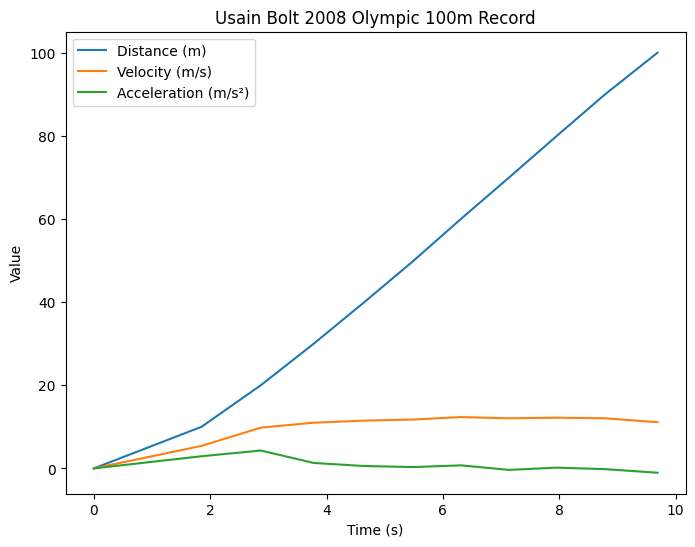

In [ ]:
import matplotlib.pyplot as plt

# Raw data
time = [0, 1.85, 2.87, 3.78, 4.65, 5.50, 6.31, 7.14, 7.96, 8.79, 9.69]
distance = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
velocity = [0, 5.41, 9.80, 10.99, 11.49, 11.76, 12.35, 12.05, 12.20, 12.05, 11.11]
acceleration = [0, 2.92, 4.30, 1.31, 0.57, 0.32, 0.73, -0.36, 0.18, -0.18, -1.04]

# Plot
plt.figure(figsize=(8, 6))

# Plot each variable vs. time
plt.plot(time, distance, label='Distance (m)')
plt.plot(time, velocity, label='Velocity (m/s)')
plt.plot(time, acceleration, label='Acceleration (m/s²)')

# Title and axis labels
plt.title("Usain Bolt 2008 Olympic 100m Record")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.show()

-----------------


## Exercise 6

Using the same data as in exercise 5, change the styling of your Usain Bolt 100m plot, e.g.:
* Draw some lines with dashes.
* Add data point marker symbols on some lines.
* Change the color of lines and marker symbols.

### Solution:

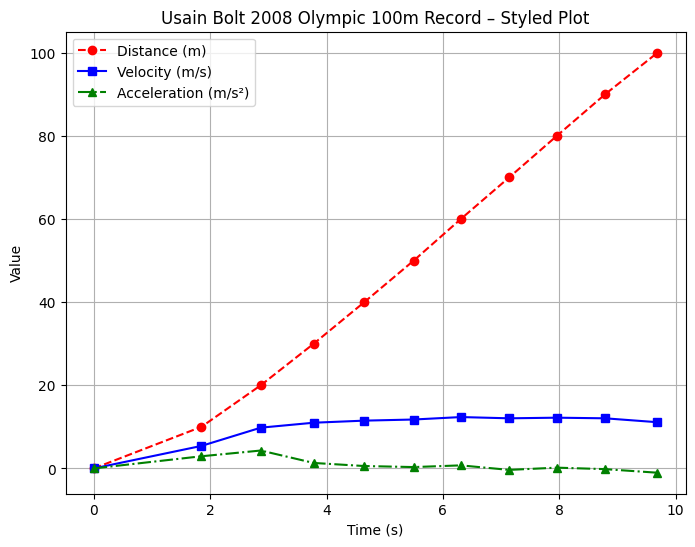

In [ ]:
import matplotlib.pyplot as plt

# Raw data
time = [0, 1.85, 2.87, 3.78, 4.65, 5.50, 6.31, 7.14, 7.96, 8.79, 9.69]
distance = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
velocity = [0, 5.41, 9.80, 10.99, 11.49, 11.76, 12.35, 12.05, 12.20, 12.05, 11.11]
acceleration = [0, 2.92, 4.30, 1.31, 0.57, 0.32, 0.73, -0.36, 0.18, -0.18, -1.04]

# Plot
plt.figure(figsize=(8, 6))

# Plot with Styling
plt.plot(time, distance, color='red', linestyle='--', marker='o', label='Distance (m)')
plt.plot(time, velocity, color='blue', linestyle='-', marker='s', label='Velocity (m/s)')
plt.plot(time, acceleration, color='green', linestyle='-.', marker='^', label='Acceleration (m/s²)')

# Title and axis labels
plt.title("Usain Bolt 2008 Olympic 100m Record – Styled Plot")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

-----------------



## Exercise 7

Given the a lists of height, weight and gender below:
* Create a scatter plot of height (y) as a function of weight (x).
* Give different colors to females and males (see `gender` list below).
  Specifically, use "teal" color for males, and "darkorange" for females.
* Add a title, and axes labels.

```python
height = [150, 152, 152, 152, 152, 152, 152, 152, 155, 155, 155, 155, 155, 155,
          155, 155, 155, 155, 157, 157, 157, 157, 157, 157, 157, 157, 160, 160,
          160, 160, 160, 160, 160, 160, 160, 160, 160, 163, 163, 163, 163, 163,
          163, 163, 163, 163, 163, 163, 165, 165, 165, 165, 165, 165, 165, 165,
          168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
          170, 170, 170, 170, 170, 170, 170, 173, 173, 173, 173, 173, 173, 173,
          173, 173, 173, 173, 175, 175, 175, 175, 175, 175, 175, 178, 178, 178,
          178, 178, 178, 178, 180, 180, 180, 183, 183, 183, 183, 183, 183, 183,
          183, 183, 183, 183, 183, 185, 188, 188, 191, 193]

weight = [73, 72, 45, 59, 95, 62, 54, 68, 77, 92, 83, 56, 47, 77, 63, 81, 52,
          110, 54, 59, 61, 90, 81, 63, 63, 59, 52, 77, 50, 63, 58, 72, 63, 65,
          69, 59, 72, 67, 59, 59, 65, 77, 61, 111, 93, 74, 68, 59, 68, 50, 77,
          74, 65, 72, 77, 86, 61, 65, 53, 60, 67, 99, 61, 70, 97, 54, 88, 99,
          68, 70, 56, 86, 63, 65, 72, 81, 68, 79, 70, 81, 79, 85, 99, 77, 71,
          81, 89, 72, 106, 56, 90, 81, 87, 81, 94, 83, 77, 94, 86, 95, 77, 77,
          92, 77, 77, 131, 97, 101, 108, 99, 90, 91, 86, 113, 126, 104, 81, 77,
          117, 63, 68, 101]

gender = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
          2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
          1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1]
```

### Solution:

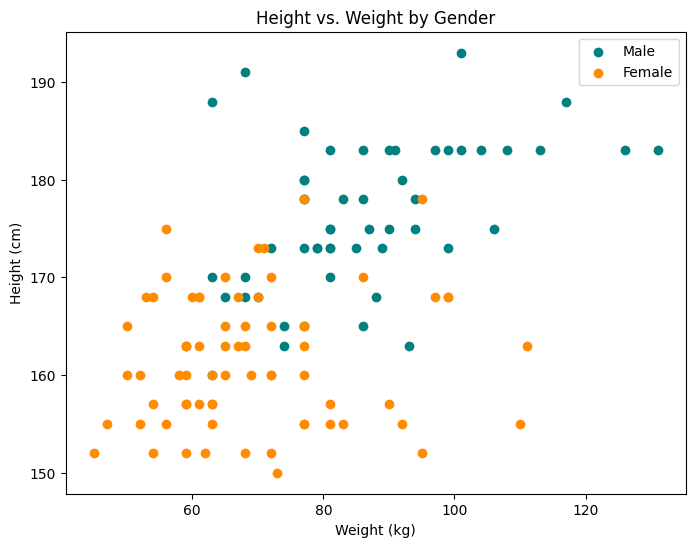

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
height = [150, 152, 152, 152, 152, 152, 152, 152, 155, 155, 155, 155, 155, 155,
          155, 155, 155, 155, 157, 157, 157, 157, 157, 157, 157, 157, 160, 160,
          160, 160, 160, 160, 160, 160, 160, 160, 160, 163, 163, 163, 163, 163,
          163, 163, 163, 163, 163, 163, 165, 165, 165, 165, 165, 165, 165, 165,
          168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
          170, 170, 170, 170, 170, 170, 170, 173, 173, 173, 173, 173, 173, 173,
          173, 173, 173, 173, 175, 175, 175, 175, 175, 175, 175, 178, 178, 178,
          178, 178, 178, 178, 180, 180, 180, 183, 183, 183, 183, 183, 183, 183,
          183, 183, 183, 183, 183, 185, 188, 188, 191, 193]

weight = [73, 72, 45, 59, 95, 62, 54, 68, 77, 92, 83, 56, 47, 77, 63, 81, 52,
          110, 54, 59, 61, 90, 81, 63, 63, 59, 52, 77, 50, 63, 58, 72, 63, 65,
          69, 59, 72, 67, 59, 59, 65, 77, 61, 111, 93, 74, 68, 59, 68, 50, 77,
          74, 65, 72, 77, 86, 61, 65, 53, 60, 67, 99, 61, 70, 97, 54, 88, 99,
          68, 70, 56, 86, 63, 65, 72, 81, 68, 79, 70, 81, 79, 85, 99, 77, 71,
          81, 89, 72, 106, 56, 90, 81, 87, 81, 94, 83, 77, 94, 86, 95, 77, 77,
          92, 77, 77, 131, 97, 101, 108, 99, 90, 91, 86, 113, 126, 104, 81, 77,
          117, 63, 68, 101]

gender = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
          2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
          1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1]

weight = np.array(weight)
height = np.array(height)
gender = np.array(gender)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(weight[gender==1], height[gender==1], color='teal', label='Male')
plt.scatter(weight[gender==2], height[gender==2], color='darkorange', label='Female')

# Title and axis labels
plt.title("Height vs. Weight by Gender")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()